In [1]:
from tensorflow.python.client import device_lib
devices=device_lib.list_local_devices()
def sizeof_fmt(num,suffix='B'):
    for unit in ['','Ki','Mi','Gi', 'Ti', 'Pi','Ei','Zi']:
        if abs(num)<1024.0:
            return "%3.1f %s%s" %(num, unit, suffix)
        num/=1024.0
    return "%.1f%s%s" %(num, 'Yi', suffix)
for d in devices:
    t=d.device_type
    name=d.physical_device_desc
    l = [item.split(':',1) for item in name.split(", ")]
    name_attr = dict([x for x in l if len (x)==2])
    dev = name_attr.get('name', 'Unnamed device')
    print(f" {d.name} || {dev} || {t} || {sizeof_fmt(d.memory_limit)}")

 /device:CPU:0 || Unnamed device || CPU || 256.0 MiB
 /device:GPU:0 ||  Quadro RTX 6000 || GPU || 21.7 GiB


In [2]:
import tensorflow as tf

from tensorflow.compat.v1.keras.backend import set_session

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import backend as K
from tensorflow import losses, optimizers
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.metrics import top_k_categorical_accuracy
from scipy.ndimage import zoom
#from tensorflow.python.framework.ops import disable_eager_execution
#disable_eager_execution()

In [4]:
import nibabel as nib
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image = nib.load(image_path)
            img = image.get_fdata()
            img = zoom(img, (0.533, 0.533, 0.413)) 
            img [img<0] = 0
            img_nor = img / np.max(img)
            img_nor = img_nor.astype(np.float32)  
            img_data_array.append(img_nor)
            class_name.append(dir1)
    return img_data_array, class_name

## extract the image array and class name
img_enh1, class_enh1 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold1')
img_enh1L, class_enh1L =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold1_L')

img_enh2, class_enh2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold2')
img_enh2L, class_enh2L =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold2_L')

img_enh3, class_enh3 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold3')
img_enh3L, class_enh3L =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold3_L')

img_enh4, class_enh4 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold4')
img_enh4L, class_enh4L =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold4_L')

img_enh5, class_enh5 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold5')
img_enh5L, class_enh5L =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\fold5_L')
################################################################################################
img_enh12, class_enh12 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold1')
img_enh1L2, class_enh1L2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold1_L')

img_enh22, class_enh22=create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold2')
img_enh2L2, class_enh2L2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold2_L')

img_enh32, class_enh32 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold3')
img_enh3L2, class_enh3L2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold3_L')

img_enh42, class_enh42 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold4')
img_enh4L2, class_enh4L2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold4_L')

img_enh52, class_enh52 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold5')
img_enh5L2, class_enh5L2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\fold5_L')
###################################### Edema T2  #####################################################
target_enh1={k: v for v, k in enumerate(np.unique(class_enh1))}
target_label_enh1=  [target_enh1[class_enh1[i]] for i in range(len(class_enh1))]
print(target_enh1)
target_enh1L={k: v for v, k in enumerate(np.unique(class_enh1L))}
target_label_enh1L=  [target_enh1L[class_enh1L[i]] for i in range(len(class_enh1L))]
print(target_enh1L)

target_enh2={k: v for v, k in enumerate(np.unique(class_enh2))}
target_label_enh2=  [target_enh2[class_enh2[i]] for i in range(len(class_enh2))]
print(target_enh2)
target_enh2L={k: v for v, k in enumerate(np.unique(class_enh2L))}
target_label_enh2L=  [target_enh2L[class_enh2L[i]] for i in range(len(class_enh2L))]
print(target_enh2L)

target_enh3={k: v for v, k in enumerate(np.unique(class_enh3))}
target_label_enh3=  [target_enh3[class_enh3[i]] for i in range(len(class_enh3))]
print(target_enh3)
target_enh3L={k: v for v, k in enumerate(np.unique(class_enh3L))}
target_label_enh3L=  [target_enh3L[class_enh3L[i]] for i in range(len(class_enh3L))]
print(target_enh3L)

target_enh4={k: v for v, k in enumerate(np.unique(class_enh4))}
target_label_enh4=  [target_enh4[class_enh4[i]] for i in range(len(class_enh4))]
print(target_enh4)
target_enh4L={k: v for v, k in enumerate(np.unique(class_enh4L))}
target_label_enh4L=  [target_enh4L[class_enh4L[i]] for i in range(len(class_enh4L))]
print(target_enh4L)

target_enh5={k: v for v, k in enumerate(np.unique(class_enh5))}
target_label_enh5=  [target_enh5[class_enh5[i]] for i in range(len(class_enh5))]
print(target_enh5)
target_enh5L={k: v for v, k in enumerate(np.unique(class_enh5L))}
target_label_enh5L=  [target_enh5L[class_enh5L[i]] for i in range(len(class_enh5L))]
print(target_enh5L)

######################################### enhance CE ##################################################
target_enh12={k: v for v, k in enumerate(np.unique(class_enh12))}
target_label_enh12=  [target_enh12[class_enh12[i]] for i in range(len(class_enh12))]
print(target_enh12)
target_enh1L2={k: v for v, k in enumerate(np.unique(class_enh1L2))}
target_label_enh1L2=  [target_enh1L2[class_enh1L2[i]] for i in range(len(class_enh1L2))]
print(target_enh1L2)

target_enh22={k: v for v, k in enumerate(np.unique(class_enh22))}
target_label_enh22=  [target_enh22[class_enh22[i]] for i in range(len(class_enh22))]
print(target_enh22)
target_enh2L2={k: v for v, k in enumerate(np.unique(class_enh2L2))}
target_label_enh2L2=  [target_enh2L2[class_enh2L2[i]] for i in range(len(class_enh2L2))]
print(target_enh2L2)

target_enh32={k: v for v, k in enumerate(np.unique(class_enh32))}
target_label_enh32=  [target_enh32[class_enh32[i]] for i in range(len(class_enh32))]
print(target_enh32)
target_enh3L2={k: v for v, k in enumerate(np.unique(class_enh3L2))}
target_label_enh3L2=  [target_enh3L2[class_enh3L2[i]] for i in range(len(class_enh3L2))]
print(target_enh3L2)

target_enh42={k: v for v, k in enumerate(np.unique(class_enh42))}
target_label_enh42=  [target_enh42[class_enh42[i]] for i in range(len(class_enh42))]
print(target_enh42)
target_enh4L2={k: v for v, k in enumerate(np.unique(class_enh4L2))}
target_label_enh4L2=  [target_enh4L2[class_enh4L2[i]] for i in range(len(class_enh4L2))]
print(target_enh4L2)

target_enh52={k: v for v, k in enumerate(np.unique(class_enh52))}
target_label_enh52=  [target_enh52[class_enh52[i]] for i in range(len(class_enh52))]
print(target_enh52)
target_enh5L2={k: v for v, k in enumerate(np.unique(class_enh5L2))}
target_label_enh5L2=  [target_enh5L2[class_enh5L2[i]] for i in range(len(class_enh5L2))]
print(target_enh5L2)

#######################################################################################################
#######################################################################################################
x_enh1=np.array(img_enh1, np.float32)
y_enh1=np.array(list(map(int,target_label_enh1)), np.float32)
X_enh1 = np.expand_dims(x_enh1, axis=4)
x_enh1L=np.array(img_enh1L, np.float32)
y_enh1L=np.array(list(map(int,target_label_enh1L)), np.float32)
X_enh1L = np.expand_dims(x_enh1L, axis=4)

x_enh2=np.array(img_enh2, np.float32)
y_enh2=np.array(list(map(int,target_label_enh2)), np.float32)
X_enh2 = np.expand_dims(x_enh2, axis=4)
x_enh2L=np.array(img_enh2L, np.float32)
y_enh2L=np.array(list(map(int,target_label_enh2L)), np.float32)
X_enh2L = np.expand_dims(x_enh2L, axis=4)

x_enh3=np.array(img_enh3, np.float32)
y_enh3=np.array(list(map(int,target_label_enh3)), np.float32)
X_enh3 = np.expand_dims(x_enh3, axis=4)
x_enh3L=np.array(img_enh3L, np.float32)
y_enh3L=np.array(list(map(int,target_label_enh3L)), np.float32)
X_enh3L = np.expand_dims(x_enh3L, axis=4)
 
x_enh4=np.array(img_enh4, np.float32)
y_enh4=np.array(list(map(int,target_label_enh4)), np.float32)
X_enh4 = np.expand_dims(x_enh4, axis=4)
x_enh4L=np.array(img_enh4L, np.float32)
y_enh4L=np.array(list(map(int,target_label_enh4L)), np.float32)
X_enh4L = np.expand_dims(x_enh4L, axis=4)

x_enh5=np.array(img_enh5, np.float32)
y_enh5=np.array(list(map(int,target_label_enh5)), np.float32)
X_enh5 = np.expand_dims(x_enh5, axis=4)
x_enh5L=np.array(img_enh5L, np.float32)
y_enh5L=np.array(list(map(int,target_label_enh5L)), np.float32)
X_enh5L = np.expand_dims(x_enh5L, axis=4)

######################################################################################################
#######################################################################################################
x_enh12=np.array(img_enh12, np.float32)
y_enh12=np.array(list(map(int,target_label_enh12)), np.float32)
X_enh12 = np.expand_dims(x_enh12, axis=4)
x_enh1L2=np.array(img_enh1L2, np.float32)
y_enh1L2=np.array(list(map(int,target_label_enh1L2)), np.float32)
X_enh1L2 = np.expand_dims(x_enh1L2, axis=4)

x_enh22=np.array(img_enh22, np.float32)
y_enh22=np.array(list(map(int,target_label_enh22)), np.float32)
X_enh22 = np.expand_dims(x_enh22, axis=4)
x_enh2L2=np.array(img_enh2L2, np.float32)
y_enh2L2=np.array(list(map(int,target_label_enh2L2)), np.float32)
X_enh2L2 = np.expand_dims(x_enh2L2, axis=4)
 
x_enh32=np.array(img_enh32, np.float32)
y_enh32=np.array(list(map(int,target_label_enh32)), np.float32)
X_enh32 = np.expand_dims(x_enh32, axis=4)
x_enh3L2=np.array(img_enh3L2, np.float32)
y_enh3L2=np.array(list(map(int,target_label_enh3L2)), np.float32)
X_enh3L2 = np.expand_dims(x_enh3L2, axis=4)

x_enh42=np.array(img_enh42, np.float32)
y_enh42=np.array(list(map(int,target_label_enh42)), np.float32)
X_enh42 = np.expand_dims(x_enh42, axis=4)
x_enh4L2=np.array(img_enh4L2, np.float32)
y_enh4L2=np.array(list(map(int,target_label_enh4L2)), np.float32)
X_enh4L2 = np.expand_dims(x_enh4L2, axis=4)

x_enh52=np.array(img_enh52, np.float32)
y_enh52=np.array(list(map(int,target_label_enh52)), np.float32)
X_enh52 = np.expand_dims(x_enh52, axis=4)
x_enh5L2=np.array(img_enh5L2, np.float32)
y_enh5L2=np.array(list(map(int,target_label_enh5L2)), np.float32)
X_enh5L2 = np.expand_dims(x_enh5L2, axis=4)

######################################################################################################
print("################ tumor edema T2 shapes #####################")

print(X_enh1.shape)
print(X_enh1L.shape)
print(y_enh1.shape)
print(y_enh1L.shape)

print("################ tumor enhance CE shapes #####################")

print(X_enh12.shape)
print(X_enh1L2.shape)
print(y_enh12.shape)
print(y_enh1L2.shape)

{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
################ tumor edema T2 shapes #####################
(84, 128, 128, 64, 1)
(16, 128, 128, 64, 1)
(84,)
(16,)
################ tumor enhance CE shapes #####################
(84, 128, 128, 64, 1)
(16, 128, 128, 64, 1)
(84,)
(16,)


In [3]:
import nibabel as nib
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image = nib.load(image_path)
            img = image.get_fdata()
            img = zoom(img, (0.533, 0.533, 0.413)) 
            img [img<0] = 0
            img_nor = img / np.max(img)
            img_nor = img_nor.astype(np.float32)
            
            img_data_array.append(img_nor)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name

img_test, class_test =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\T2\\External')
img_test2, class_test2 =create_dataset(r'C:\\Dhruba Research Drive\\edeT2_enhCE\\CE\\External')
####################################################################################################

target_dict_test={k: v for v, k in enumerate(np.unique(class_test))}
target_val_test=  [target_dict_test[class_test[i]] for i in range(len(class_test))]
print(target_dict_test)
####################################################################################################

target_dict_test2={k: v for v, k in enumerate(np.unique(class_test2))}
target_val_test2=  [target_dict_test2[class_test2[i]] for i in range(len(class_test2))]
print(target_dict_test2)
#######################################################################################################
### Enh_T1 tumor Shape
x_test=np.array(img_test, np.float32)
y_test=np.array(list(map(int,target_val_test)), np.float32)
X_test = np.expand_dims(x_test, axis=4)
### Enh_CE tumor Shape
x_test2=np.array(img_test2, np.float32)
y_test2=np.array(list(map(int,target_val_test2)), np.float32)
X_test2 = np.expand_dims(x_test2, axis=4)

print("################ Enh_T2 tumor shapes #####################")
print(X_test.shape)
print(y_test.shape)
print("################ Enh_CE tumor shapes #####################")
print(X_test2.shape)
print(y_test2.shape)

{'GBM': 0, 'LYM': 1, 'Mets': 2}
{'GBM': 0, 'LYM': 1, 'Mets': 2}
################ Enh_T2 tumor shapes #####################
(85, 128, 128, 64, 1)
(85,)
################ Enh_CE tumor shapes #####################
(85, 128, 128, 64, 1)
(85,)


In [5]:
from scipy import ndimage
############################## LYM ################################################
############################# Fold1 ###################################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh1L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh1L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh1L[d]
            class_aug_array.append(y_train_class)

X_enh_aug1_r = np.array(img_aug_array, np.float32)
X_enh_aug1_r = np.expand_dims(X_enh_aug1_r, axis=4)
print(X_enh_aug1_r.shape)
y_enh_aug1_r = np.array(class_aug_array, np.float32)
print(y_enh_aug1_r.shape)
###########
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh1L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh1L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh1L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug1_r2 = np.array(img_aug_array, np.float32)
X_enh_aug1_r2 = np.expand_dims(X_enh_aug1_r2, axis=4)
print(X_enh_aug1_r2.shape)
y_enh_aug1_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug1_r2.shape)
############################# Fold2 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh2L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh2L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh2L[d]
            class_aug_array.append(y_train_class)

X_enh_aug2_r = np.array(img_aug_array, np.float32)
X_enh_aug2_r = np.expand_dims(X_enh_aug2_r, axis=4)
print(X_enh_aug2_r.shape)
y_enh_aug2_r = np.array(class_aug_array, np.float32)
print(y_enh_aug2_r.shape)
##################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh2L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh2L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh2L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug2_r2 = np.array(img_aug_array, np.float32)
X_enh_aug2_r2 = np.expand_dims(X_enh_aug2_r2, axis=4)
print(X_enh_aug2_r2.shape)
y_enh_aug2_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug2_r2.shape)
############################# Fold3 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh3L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh3L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh3L[d]
            class_aug_array.append(y_train_class)

X_enh_aug3_r = np.array(img_aug_array, np.float32)
X_enh_aug3_r = np.expand_dims(X_enh_aug3_r, axis=4)
print(X_enh_aug3_r.shape)
y_enh_aug3_r = np.array(class_aug_array, np.float32)
print(y_enh_aug3_r.shape)
#################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh3L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh3L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh3L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug3_r2 = np.array(img_aug_array, np.float32)
X_enh_aug3_r2 = np.expand_dims(X_enh_aug3_r2, axis=4)
print(X_enh_aug3_r2.shape)
y_enh_aug3_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug3_r2.shape)
############################# Fold4 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh4L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh4L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh4L[d]
            class_aug_array.append(y_train_class)

X_enh_aug4_r = np.array(img_aug_array, np.float32)
X_enh_aug4_r = np.expand_dims(X_enh_aug4_r, axis=4)
print(X_enh_aug4_r.shape)
y_enh_aug4_r = np.array(class_aug_array, np.float32)
print(y_enh_aug4_r.shape)
################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh4L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh4L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh4L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug4_r2 = np.array(img_aug_array, np.float32)
X_enh_aug4_r2 = np.expand_dims(X_enh_aug4_r2, axis=4)
print(X_enh_aug4_r2.shape)
y_enh_aug4_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug4_r2.shape)
############################# Fold5 ###################################

img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh5L.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh5L[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh5L[d]
            class_aug_array.append(y_train_class)

X_enh_aug5_r = np.array(img_aug_array, np.float32)
X_enh_aug5_r = np.expand_dims(X_enh_aug5_r, axis=4)
print(X_enh_aug5_r.shape)
y_enh_aug5_r = np.array(class_aug_array, np.float32)
print(y_enh_aug5_r.shape)
################
img_aug_array=[]
class_aug_array = []
angles = np.arange(-5, 16, 10)
for d in range (y_enh5L2.shape[0]):
    for e in range (3):
            volume = ndimage.rotate(img_enh5L2[d], angles[e], reshape=False)
            img_aug_array.append(volume)
            y_train_class = y_enh5L2[d]
            class_aug_array.append(y_train_class)

X_enh_aug5_r2 = np.array(img_aug_array, np.float32)
X_enh_aug5_r2 = np.expand_dims(X_enh_aug5_r2, axis=4)
print(X_enh_aug5_r2.shape)
y_enh_aug5_r2 = np.array(class_aug_array, np.float32)
print(y_enh_aug5_r2.shape)

(48, 128, 128, 64, 1)
(48,)
(48, 128, 128, 64, 1)
(48,)
(48, 128, 128, 64, 1)
(48,)
(48, 128, 128, 64, 1)
(48,)
(48, 128, 128, 64, 1)
(48,)
(48, 128, 128, 64, 1)
(48,)
(45, 128, 128, 64, 1)
(45,)
(45, 128, 128, 64, 1)
(45,)
(33, 128, 128, 64, 1)
(33,)
(33, 128, 128, 64, 1)
(33,)


In [6]:
X_enh1c = np.concatenate((X_enh1, X_enh_aug1_r), axis=0)
print(X_enh1c.shape)
#############################################################################
X_enh2c = np.concatenate((X_enh2, X_enh_aug2_r), axis=0)
print(X_enh2c.shape)
#############################################################################
X_enh3c = np.concatenate((X_enh3, X_enh_aug3_r), axis=0)
print(X_enh3c.shape)
#############################################################################
X_enh4c = np.concatenate((X_enh4, X_enh_aug4_r), axis=0)
print(X_enh4c.shape)
#############################################################################
X_enh5c = np.concatenate((X_enh5, X_enh_aug5_r), axis=0)
print(X_enh5c.shape)

################################# label ######################################
##############################################################################
y_enh1c = np.concatenate((y_enh1, y_enh_aug1_r), axis=0)
print(y_enh1c.shape)
#############################################################################
y_enh2c = np.concatenate((y_enh2, y_enh_aug2_r), axis=0)
print(y_enh2c.shape)
#############################################################################
y_enh3c = np.concatenate((y_enh3, y_enh_aug3_r), axis=0)
print(y_enh3c.shape)
#############################################################################
y_enh4c = np.concatenate((y_enh4, y_enh_aug4_r), axis=0)
print(y_enh4c.shape)
#############################################################################
y_enh5c = np.concatenate((y_enh5, y_enh_aug5_r), axis=0)
print(y_enh5c.shape)

#############
X_enh1c2 = np.concatenate((X_enh12, X_enh_aug1_r2), axis=0)
print(X_enh1c2.shape)
#############################################################################
X_enh2c2 = np.concatenate((X_enh22, X_enh_aug2_r2), axis=0)
print(X_enh2c2.shape)
#############################################################################
X_enh3c2 = np.concatenate((X_enh32, X_enh_aug3_r2), axis=0)
print(X_enh3c2.shape)
#############################################################################
X_enh4c2 = np.concatenate((X_enh42, X_enh_aug4_r2), axis=0)
print(X_enh4c2.shape)
#############################################################################
X_enh5c2 = np.concatenate((X_enh52, X_enh_aug5_r2), axis=0)
print(X_enh5c2.shape)
################################# label ######################################
##############################################################################
y_enh1c2 = np.concatenate((y_enh12, y_enh_aug1_r2), axis=0)
print(y_enh1c2.shape)
#############################################################################
y_enh2c2 = np.concatenate((y_enh22, y_enh_aug2_r2), axis=0)
print(y_enh2c2.shape)
#############################################################################
y_enh3c2 = np.concatenate((y_enh32, y_enh_aug3_r2), axis=0)
print(y_enh3c2.shape)
#############################################################################
y_enh4c2 = np.concatenate((y_enh42, y_enh_aug4_r2), axis=0)
print(y_enh4c2.shape)
#############################################################################
y_enh5c2 = np.concatenate((y_enh52, y_enh_aug5_r2), axis=0)
print(y_enh5c2.shape)

(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(127, 128, 128, 64, 1)
(108, 128, 128, 64, 1)
(132,)
(132,)
(132,)
(127,)
(108,)
(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(132, 128, 128, 64, 1)
(127, 128, 128, 64, 1)
(108, 128, 128, 64, 1)
(132,)
(132,)
(132,)
(127,)
(108,)


In [7]:
import scipy

def scaleit(image, factor, isseg=False):
    order = 0 if isseg == True else 1

    height, width, depth= image.shape
    zheight             = int(np.round(factor * height))
    zwidth              = int(np.round(factor * width))
    zdepth              = depth

    if factor < 1.0:
        newimg  = np.zeros_like(image)
        row     = (height - zheight) // 2
        col     = (width - zwidth) // 2
        layer   = (depth - zdepth) // 2
        newimg[row:row+zheight, col:col+zwidth, layer:layer+zdepth] = scipy.ndimage.interpolation.zoom(image, (float(factor), float(factor), 1.0), order=order, mode='nearest')[0:zheight, 0:zwidth, 0:zdepth]

        return newimg

    elif factor > 1.0:
        row     = (zheight - height) // 2
        col     = (zwidth - width) // 2
        layer   = (zdepth - depth) // 2

        newimg = scipy.ndimage.interpolation.zoom(image[row:row+zheight, col:col+zwidth, layer:layer+zdepth], (float(factor), float(factor), 1.0), order=order, mode='nearest')  
        
        extrah = (newimg.shape[0] - height) // 2
        extraw = (newimg.shape[1] - width) // 2
        extrad = (newimg.shape[2] - depth) // 2
        newimg = newimg[extrah:extrah+height, extraw:extraw+width, extrad:extrad+depth]

        return newimg

    else:
        return image
    
################################ Ede_T2  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh1c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh1c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh1c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug1 = np.array(img_aug_array, np.float32)
X_enh_aug1 = np.expand_dims(X_enh_aug1, axis=4)
print(X_enh_aug1.shape)
y_enh_aug1 = np.array(class_aug_array, np.float32)
print(y_enh_aug1.shape)

################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh1c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh1c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh1c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug12 = np.array(img_aug_array, np.float32)
X_enh_aug12 = np.expand_dims(X_enh_aug12, axis=4)
print(X_enh_aug12.shape)
y_enh_aug12 = np.array(class_aug_array, np.float32)
print(y_enh_aug12.shape)

################################ Ede_T2  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh2c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh2c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh2c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug2 = np.array(img_aug_array, np.float32)
X_enh_aug2 = np.expand_dims(X_enh_aug2, axis=4)
print(X_enh_aug2.shape)
y_enh_aug2 = np.array(class_aug_array, np.float32)
print(y_enh_aug2.shape)
################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh2c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh2c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh2c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug22 = np.array(img_aug_array, np.float32)
X_enh_aug22 = np.expand_dims(X_enh_aug22, axis=4)
print(X_enh_aug22.shape)
y_enh_aug22 = np.array(class_aug_array, np.float32)
print(y_enh_aug22.shape)

################################ Ede_T2  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh3c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh3c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh3c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug3 = np.array(img_aug_array, np.float32)
X_enh_aug3 = np.expand_dims(X_enh_aug3, axis=4)
print(X_enh_aug3.shape)
y_enh_aug3 = np.array(class_aug_array, np.float32)
print(y_enh_aug3.shape)

################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh3c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh3c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh3c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug32 = np.array(img_aug_array, np.float32)
X_enh_aug32 = np.expand_dims(X_enh_aug32, axis=4)
print(X_enh_aug32.shape)
y_enh_aug32 = np.array(class_aug_array, np.float32)
print(y_enh_aug32.shape)

################################ Ede_T2  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh4c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh4c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh4c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug4 = np.array(img_aug_array, np.float32)
X_enh_aug4 = np.expand_dims(X_enh_aug4, axis=4)
print(X_enh_aug4.shape)
y_enh_aug4 = np.array(class_aug_array, np.float32)
print(y_enh_aug4.shape)
################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh4c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh4c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh4c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug42 = np.array(img_aug_array, np.float32)
X_enh_aug42 = np.expand_dims(X_enh_aug42, axis=4)
print(X_enh_aug42.shape)
y_enh_aug42 = np.array(class_aug_array, np.float32)
print(y_enh_aug42.shape)

# ################################ Ede_T2  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh5c.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh5c[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh5c[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug5 = np.array(img_aug_array, np.float32)
X_enh_aug5 = np.expand_dims(X_enh_aug5, axis=4)
print(X_enh_aug5.shape)
y_enh_aug5 = np.array(class_aug_array, np.float32)
print(y_enh_aug5.shape)
# ################################ Enhan_CE  ######################################
img_aug_array=[]
class_aug_array = []
zoom = [0.9, 1.0, 1.1]
for d in range (y_enh5c2.shape[0]):
    for e in range (3):
            volume = scaleit(X_enh5c2[d, :, :, :, 0], zoom[e], isseg=False)
            img_aug_array.append(volume)
            
            y_train_class = y_enh5c2[d]
            class_aug_array.append(y_train_class)
        
X_enh_aug52 = np.array(img_aug_array, np.float32)
X_enh_aug52 = np.expand_dims(X_enh_aug52, axis=4)
print(X_enh_aug52.shape)
y_enh_aug52 = np.array(class_aug_array, np.float32)
print(y_enh_aug52.shape)
##################################################################################################################

(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(396, 128, 128, 64, 1)
(396,)
(381, 128, 128, 64, 1)
(381,)
(381, 128, 128, 64, 1)
(381,)
(324, 128, 128, 64, 1)
(324,)
(324, 128, 128, 64, 1)
(324,)


In [8]:
X_enh_f1 = X_enh_aug1[:, ::-1, :]
y_enh_f1 = y_enh_aug1
###############################################
X_enh_f2 = X_enh_aug2[:, ::-1, :]
y_enh_f2 = y_enh_aug2
###############################################
X_enh_f3 = X_enh_aug3[:, ::-1, :]
y_enh_f3 = y_enh_aug3
###############################################
X_enh_f4 = X_enh_aug4[:, ::-1, :]
y_enh_f4 = y_enh_aug4
###############################################
X_enh_f5 = X_enh_aug5[:, ::-1, :]
y_enh_f5 = y_enh_aug5
###############################################
X_enh_f12 = X_enh_aug12[:, ::-1, :]
y_enh_f12 = y_enh_aug12
###############################################
X_enh_f22 = X_enh_aug22[:, ::-1, :]
y_enh_f22 = y_enh_aug22
###############################################
X_enh_f32 = X_enh_aug32[:, ::-1, :]
y_enh_f32 = y_enh_aug32
###############################################
X_enh_f42 = X_enh_aug42[:, ::-1, :]
y_enh_f42 = y_enh_aug42
###############################################
X_enh_f52= X_enh_aug52[:, ::-1, :]
y_enh_f52 = y_enh_aug52
###############################################

In [36]:
# X_train_aug1 = np.concatenate((X_enh_aug2, X_enh_f2, X_enh_aug3, X_enh_f3, X_enh_aug4, X_enh_f4,
#                               X_enh_aug5, X_enh_f5), axis=0)
# print(X_train_aug1.shape)
# y_train_aug1 = np.concatenate((y_enh_aug2, y_enh_f2, y_enh_aug3, y_enh_f3, y_enh_aug4, y_enh_f4,
#                               y_enh_aug5, y_enh_f5), axis=0)
# print(y_train_aug1.shape)
# ########################################################################
# X_train_aug12 = np.concatenate((X_enh_aug22, X_enh_f22, X_enh_aug32, X_enh_f32, X_enh_aug42, X_enh_f42,
#                                X_enh_aug52, X_enh_f52), axis=0)
# print(X_train_aug12.shape)
# y_train_aug12 = np.concatenate((y_enh_aug22, y_enh_f22, y_enh_aug32, y_enh_f32, y_enh_aug42, y_enh_f42,
#                                y_enh_aug52, y_enh_f52), axis=0)
# print(y_train_aug12.shape)
########################################################################
X_test = np.concatenate((X_enh1, X_enh1L), axis=0)
y_test = np.concatenate((y_enh1, y_enh1L), axis=0)
X_test2 = np.concatenate((X_enh12, X_enh1L2), axis=0)
y_test2 = np.concatenate((y_enh12, y_enh1L2), axis=0)

print(X_test.shape)
print(y_test.shape)
print(X_test2.shape)
print(y_test2.shape)

(100, 128, 128, 64, 1)
(100,)
(100, 128, 128, 64, 1)
(100,)


In [37]:
y_train_enc1 = to_categorical(y_train_aug1)
y_train_enc2 = to_categorical(y_train_aug12)
y_test_enc1 = to_categorical (y_test)
y_test_enc2 = to_categorical (y_test2)
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2.]


In [13]:
def CstmNet_2(input_shape=(128, 128, 64, 1)):

    X1_input = Input(input_shape)
    X2_input = Input(input_shape)
    
############ First input branch ######################

    X1 = Conv3D(32, (9, 9, 9), strides=1, name='conv3', padding="same", kernel_initializer=glorot_uniform(seed=0))(X1_input)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling3D(6, strides=6)(X1) 
    
    X1 = Conv3D(32, (6, 6, 6), strides=1, name='conv2', padding="same", kernel_initializer=glorot_uniform(seed=0))(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling3D(3, strides=3)(X1) 


    X1 = Conv3D(16, (3, 3, 3), strides=1, name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling3D(3, strides=2)(X1)   
      
        
############ Second input branch ######################

    X2 = Conv3D(32, (9, 9, 9), strides=1, name='conv3_1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X2_input)
    X2 = BatchNormalization(axis=-1)(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling3D(6, strides=6)(X2) 
    
    X2 = Conv3D(32, (6, 6, 6), strides=1, name='conv2_1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X2)
    X2 = BatchNormalization(axis=-1)(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling3D(3, strides=3)(X2) 

    X2 = Conv3D(16, (3, 3, 3), strides=1, name='conv1_1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X2)
    X2 = BatchNormalization(axis=-1)(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling3D(3, strides=2)(X2)     

    
########## Concatenation layer to concatenate the two inputs prior to dense layers to calculate outputs ########
    final_concat = concatenate([X1, X2])

    X = Flatten()(final_concat)
    
############ Final Layer ######################

    X = Dense(256, activation='relu', name='fc2', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dropout(0.2)(X)
    X = Dense(128, activation='relu', name='fc3', kernel_initializer=glorot_uniform(seed=0))(X)
    drop = Dropout(0.2)(X)
    output = Dense(3, activation='softmax', name='fc5',kernel_initializer=glorot_uniform(seed=0))(drop) 
    model = Model(inputs=[X1_input, X2_input], outputs=output, name='CstmNet_2')
    
    return model

model = CstmNet_2(input_shape=(128, 128, 64, 1))
model.summary()

Model: "CstmNet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                4, 1)]                                                            
                                                                                                  
 input_4 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                4, 1)]                                                            
                                                                                                  
 conv3 (Conv3D)                 (None, 128, 128, 64  23360       ['input_3[0][0]']                
                                , 32)                                                     

                                                                                                  
 fc3 (Dense)                    (None, 128)          32896       ['dropout_2[0][0]']              
                                                                                                  
 dropout_3 (Dropout)            (None, 128)          0           ['fc3[0][0]']                    
                                                                                                  
 fc5 (Dense)                    (None, 3)            387         ['dropout_3[0][0]']              
                                                                                                  
Total params: 624,739
Trainable params: 624,419
Non-trainable params: 320
__________________________________________________________________________________________________


In [4]:
classification_model = load_model('f02_edemT2_enhCE_3cls.eh03-acc0.89.hdf5', compile = False)

In [36]:
classification_model.summary()

Model: "CstmNet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                4, 1)]                                                            
                                                                                                  
 input_6 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                4, 1)]                                                            
                                                                                                  
 conv3 (Conv3D)                 (None, 128, 128, 64  23360       ['input_5[0][0]']                
                                , 32)                                                     

                                                                                                  
 dropout_4 (Dropout)            (None, 256)          0           ['fc2[0][0]']                    
                                                                                                  
 fc3 (Dense)                    (None, 128)          32896       ['dropout_4[0][0]']              
                                                                                                  
 dropout_5 (Dropout)            (None, 128)          0           ['fc3[0][0]']                    
                                                                                                  
 fc5 (Dense)                    (None, 3)            387         ['dropout_5[0][0]']              
                                                                                                  
Total params: 624,739
Trainable params: 624,419
Non-trainable params: 320
___________________________________

In [5]:
#from sklearn.metrics import accuracy_score

y_pred = classification_model.predict(x=[X_test, X_test2], batch_size = 12)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
# test = list()
# for i in range(len(y_test)):
#     test.append(np.argmax(y_test_enc1[i]))
    
# a = accuracy_score(y_test, pred)
# print('Accuracy is:', a*100)
print(y_test)
print(y_pred)

8/8 [==============================] - 6s 283ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[[9.64483619e-01 1.83857661e-02 1.71306506e-02]
 [7.12541044e-01 5.31093553e-02 2.34349653e-01]
 [9.78984535e-01 1.01309670e-02 1.08844908e-02]
 [6.94056034e-01 9.08781663e-02 2.15065837e-01]
 [4.37221557e-01 5.11112548e-02 5.11667192e-01]
 [9.84617829e-01 1.09577244e-02 4.42446116e-03]
 [9.96627092e-01 2.32501095e-03 1.04792463e-03]
 [9.70899343e-01 1.33140497e-02 1.57866422e-02]
 [9.97121751e-01 2.11461610e-03 7.63547665e-04]
 [6.72191381e-01 4.16936465e-02 2.86114991e-01]
 [9.93720293e-01 2.13891477e-03 4.14077938e-03]
 [9.61407006e-01 5.15358429e-03 3.34393382e-02]
 [9.19430971e-01 1.44000985e-02 6.61689192e-02]
 [9.43955600e-01 3.94155942e-02 1.66288037e-02]
 [8.61967564e-0

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os
import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam
import cv2

In [87]:
LAYER_NAME = 'conv2_1'
grad_model = tf.keras.models.Model([classification_model.inputs], [classification_model.get_layer(LAYER_NAME).output, classification_model.output])
#grad_model.summary()

(128, 128, 64, 1)


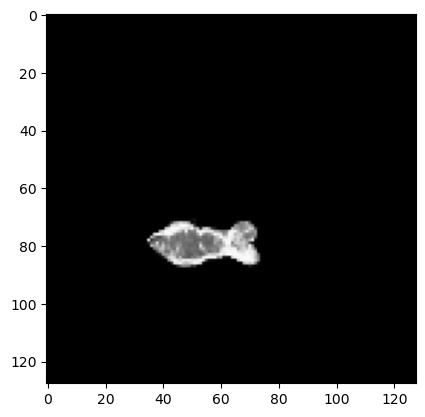

In [88]:
print(X_test[0].shape)
plt.imshow(X_test2[0][:,:,32,0], cmap = 'gray')
plt.show()

(128, 128, 64, 1)
(128, 128, 64, 1)
(1, 128, 128, 64, 1)
(1, 128, 128, 64, 1)


Text(0.5, 1.0, 'Overlay')

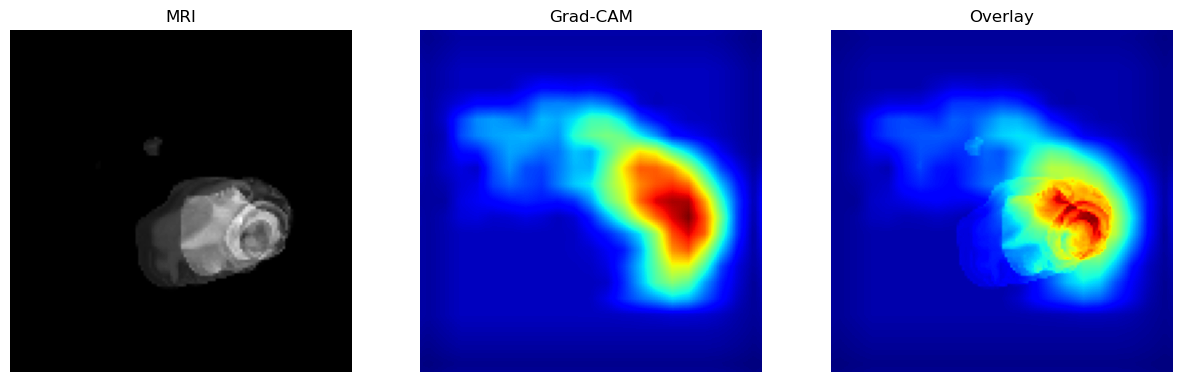

In [197]:
from skimage.transform import resize
##----Load---Image
img_num = 84
image1= X_test[img_num]
image2= X_test2[img_num]

resized_img1=image1[:,:,:,0]
resized_img2=image2[:,:,:,0]

#resized_img=resize_image_with_crop_or_pad(image=image,img_size=(128,128,128),mode='symmetric')
#resized_img=image
print(image1.shape)
print(image2.shape)
io_img1=tf.expand_dims(image1, axis=0)
io_img2=tf.expand_dims(image2, axis=0)
print(io_img1.shape)
print(io_img2.shape)
###----index of the class
CLASS_INDEX=2

###--Compute GRADIENT
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model([io_img1, io_img2])
    loss = predictions[:, CLASS_INDEX]

# Extract filters and gradients
output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

# Average gradients spatially
weights = tf.reduce_mean(grads, axis=(0, 1, 2))
# Build a ponderated map of filters according to gradients importance
cam = np.zeros(output.shape[0:3], dtype=np.float32)

for index, w in enumerate(weights):
    cam += w * output[:, :, :, index]
    
capi=resize(cam,(128,128,64)) #resizing to the image size (input size of the model)

capi = np.maximum(capi,0)
heatmap = (capi - capi.min()) / (capi.max() - capi.min())
axial_grad_cmap_img=np.squeeze(heatmap[: ,:, 32])

f, axarr = plt.subplots(1,3,figsize=(15,5));

## To move heatmap right-left, up-down
M2 = np.float32([[1, 0, -24], [0, 1, 15]])

## warpAffine does appropriate shifting given the translation matrix.
#axial_grad_cmap_img2 = cv2.warpAffine(axial_grad_cmap_img, M1, (64, 128))

coronal_ct_img=np.squeeze(resized_img1[:, :, 22]) #to view slice number 18; total slices 64, 0-63
coronal_ct_img2=np.squeeze(resized_img1[:, :, 45]) #slice number 26 overlapping slice 18
coronal_ct_img3=np.squeeze(resized_img2[:, :, 20])  
coronal_ct_img4=np.squeeze(resized_img2[:, :, 30])  
coronal_ct_img5=np.squeeze(resized_img1[:, :, 37])  #slice number 35 overlapping slice 18, 26, 54, 48

coronal_grad_cmap_img = np.squeeze(heatmap[:, :, 42]) #to view heatmap for slice number 35
coronal_grad_cmap_img2 = np.squeeze(heatmap[:, :, 22]) #to view heatmap for slice number 35
heatmap_overlay=cv2.addWeighted(coronal_grad_cmap_img, 0.5, coronal_grad_cmap_img2, 0.5, 0)

##############################################################################################################
## uncomment below to apply the heatmap movement as specified by "M2"
#coronal_grad_cmap_img = cv2.warpAffine(coronal_grad_cmap_img, M2, (128, 128))


img_overlay=cv2.addWeighted(coronal_ct_img, 0.5, coronal_ct_img2, 0.5, 0)
img_overlay=cv2.addWeighted(coronal_ct_img3, 0.3, img_overlay, 0.7, 0)
img_overlay=cv2.addWeighted(coronal_ct_img4, 0.3, img_overlay, 0.7, 0)
img_overlay=cv2.addWeighted(coronal_ct_img5, 0.3, img_overlay, 0.7, 0)

img_plot = axarr[0].imshow(img_overlay, cmap='gray');
axarr[0].axis('off')
axarr[0].set_title('MRI')

img_plot = axarr[1].imshow(heatmap_overlay, cmap='jet');
axarr[1].axis('off')
axarr[1].set_title('Grad-CAM')
    
Coronal_overlay3=cv2.addWeighted(heatmap_overlay, 0.5, img_overlay, 0.5, 0)

    
img_plot = axarr[2].imshow(Coronal_overlay3,cmap='jet');
axarr[2].axis('off')
axarr[2].set_title('Overlay')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


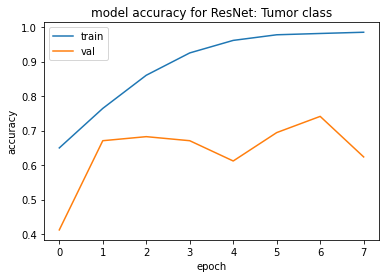

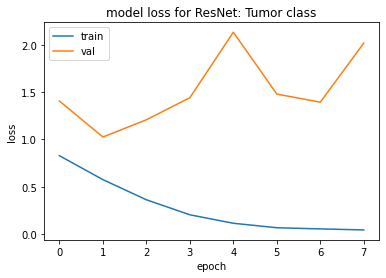

In [14]:
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy for ResNet: Tumor class')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for ResNet: Tumor class')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [97]:
y_pred_int = np.argmax(y_pred, axis=1) 
y_pred_int.dtype

dtype('int64')

In [26]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# def top_2_categorical_accuracy(y_test_enc1, y_pred):
#     return top_k_categorical_accuracy(y_test_enc1, y_pred, k=2)
# m = top_k_categorical_accuracy(y_test_enc1, y_pred, k=2)

# with tf.Session() as sess:  print(sum(m.eval())/np.shape(y_test)[0]*100)

91.0891089108911
